# Analyzing collected data

Before data can be easily analyzed, it must be processed by the parallel-reduction script. Because the files are typically large, you want to submit it to the batch system. 

When a run is complete, execute the following command with RUN replaced by the run number:
```
# bsub -q psnehhiprioq -o run.out -n 32 mpirun --mca btl ^openib python parallel-reduce.py RUN
```

This will output reduced output files at the directory specified in the script (or as an option).

## Definitions and imports

In [1]:
import h5py
import pandas as pd
import numpy as np
import os.path
from x340helpers import *

# %matplotlib inline
%matplotlib notebook
from matplotlib.pyplot import *

In [2]:
rcParams['figure.dpi'] = 100

In [55]:
#data_dir = '/reg/neh/home/abritz/X340/testrun'
#data_dir = '/reg/neh/home/aloukian/Documents/x340'
#data_dir = '/reg/d/psdm/xpp/xpplu4817/scratch/results/x340-reductions'
data_dir = '/reg/d/psdm/xpp/xpplu4817/scratch/aloukian/test'

def construct_dataframe(run, template='xpplu4817-run{run}-reduced.h5', keys={}):
    path = os.path.join(data_dir, template.format(run=run))
    
    with h5py.File(path, 'r') as sf:
        # process timedeltas
        bitmask = 0xFFFFFFFF
        ns = (sf['timestamps'][:][:]['ts'] & bitmask)
        s = (sf['timestamps'][:][:]['ts'] >> 32)
        ts = s.astype('datetime64[s]') + ns.astype('timedelta64[ns]')
        fiducials = sf['timestamps'][:][:]['fid']
        _data_keys = {'timestamps': ts, 'fiducials': fiducials, 'run': int(run)}
        
        for k,v in keys.items():
            name, record = v
            _data_keys.update({k: sf[name][:][:][record]})
            
        data = pd.DataFrame(data=_data_keys)
    return data, str(path)

## Load file and construct pandas dataframe

In [56]:
keys = {
    'cspad': ['cspad', 'sum'], 
    'cspad_good': ['cspad', 'isgood'],
    'epix_filt': ['epix_1', 'filt_sum'], 
    'epix_open': ['epix_1', 'open_sum'],
    'evr0': ['evr0', 'flags'],
    'ccm_E': ['epics', 'ccm_E'],
    'las_lensv': ['epics', 'las_lensv'],
}
df, path = construct_dataframe(24, keys=keys)

df

ccm_E         cspad  cspad_good      epix_filt     epix_open  evr0  \
0      8.349986  2.582776e+08           1  258010.732300  6.253745e+06     1   
1      8.349986  2.975024e+08           1  277160.623903  7.114308e+06     1   
2      8.349986  2.523425e+08           1  247849.392595  6.170649e+06     2   
3      8.349986  1.126119e+08           1  141034.866005  2.271119e+06     1   
4      8.349986  2.759043e+08           1  262683.091288  6.951514e+06     1   
5      8.349986  1.260052e+08           1  137349.266249  2.445957e+06     1   
6      8.349986  6.510866e+07           1   74696.662214  1.381758e+06     1   
7      8.349986  3.936567e+08           1  422000.358458  9.774382e+06     1   
8      8.349986  4.838701e+08           1  427315.436422  1.214334e+07     2   
9      8.349986  7.570992e+07           1   75320.598764  1.560205e+06     1   
10     8.349986  3.151902e+08           1  288692.982117  7.671669e+06     1   
11     8.349986  1.776500e+08           1  165031.222105  3.368931e+06     1   
12     8.349986  4.804443e+08           1  466344.230770  1.267452e+07     1   
13     8.349986  3.050552e+07           1   33700.563435  6.198171e+05     1   
14     8.349986  3.747302e+08           1  334676.381968  9.369450e+06     2   
15     8.349986  3.079059e+08           1  333725.842264  7.740645e+06     1   
16     8.349986  2.566605e+08           1  249981.750759  6.315845e+06     1   
17     8.349986  5.575370e+08           1  577189.459957  1.458316e+07     1   
18     8.349986  1.627967e+08           1  186589.618933  3.122172e+06     1   
19     8.349986  2.795606e+08           1  252706.482574  6.655209e+06     1   
20     8.349986  3.012449e+07           1   32577.428343  6.303924e+05     2   
21     8.349986  4.364493e+08           1  490513.508675  1.150744e+07     1   
22     8.349986  4.139255e+08           1  376082.787708  1.088450e+07     1   
23     8.349986  2.413279e+08           1  235298.482107  5.471097e+06     1   
24     8.349986  1.206693e+08           1  129233.167816  2.454914e+06     1   
25     8.349986  3.942812e+08           1  349917.738621  1.003855e+07     1   
26     8.349986  3.596952e+07           1   41287.618330  7.514080e+05     2   
27     8.349986  2.342319e+08           1  274888.676107  5.727590e+06     1   
28     8.349986  3.359694e+08           1  321145.384369  8.581166e+06     1   
29     8.349986  2.354696e+08           1  268087.384636  5.445728e+06     1   
...         ...           ...         ...            ...           ...   ...   
28376  8.349986  2.871904e+07           1   30075.559837  6.220061e+05     1   
28377  8.349986  2.127752e+08           1  202781.319523  4.545365e+06     1   
28378  8.349986  9.905093e+07           1  134008.856503  2.074750e+06     1   
28379  8.349986  9.310785e+07           1   90622.263803  1.863695e+06     1   
28380  8.349986  2.004484e+08           1  176008.017639  3.337761e+06     2   
28381  8.349986  3.924378e+08           1  396502.294439  1.050829e+07     1   
28382  8.349986  2.888085e+08           1  335840.233622  7.331838e+06     1   
28383  8.349986  5.951338e+08           1  513248.010132  1.548778e+07     1   
28384  8.349986  3.141233e+08           1  320312.019503  8.016939e+06     1   
28385  8.349986  3.002192e+08           1  272145.317997  6.986772e+06     1   
28386  8.349986  2.475090e+08           1  264691.882090  5.982410e+06     2   
28387  8.349986  1.070004e+08           1  119163.024652  2.111033e+06     1   
28388  8.349986  9.259895e+07           1   91248.149616  1.780934e+06     1   
28389  8.349986  3.282202e+08           1  365715.997751  8.536503e+06     1   
28390  8.349986  1.303243e+08           1  142561.743423  2.502357e+06     1   
28391  8.349986  1.075817e+08           1  122641.200691  2.152162e+06     1   
28392  8.349986  7.140818e+07           1   72579.282864  1.414207e+06     2   
28393  8.349986  6.668218e+07           1   73059.357607  1.368523e+06     1   
28394  8.3

In [66]:
df.query('evr0 == 5')

ccm_E        cspad  cspad_good  epix_filt  epix_open  evr0  \
59     8.349986  1580.187681           1   0.000000   0.000000     5   
179    8.349986  1892.143961           1   0.000000   0.000000     5   
299    8.349986  1635.763279           1   0.000000  22.237911     5   
419    8.349986  1691.777281           1   0.000000  24.984642     5   
539    8.349986  1648.752048           1   0.000000   0.000000     5   
659    8.349986  1630.530624           1   0.000000   0.000000     5   
779    8.349986  1806.257505           1   0.000000  37.286419     5   
899    8.349986  1591.820219           1   0.000000   0.000000     5   
1019   8.349986  1535.170597           1   0.000000   0.000000     5   
1168   8.349986  1750.297678           1   0.000000   0.000000     5   
1288   8.349986  1847.989988           1   0.000000   0.000000     5   
1408   8.349986  1211.877165           1   0.000000   0.000000     5   
1528   8.349986  1602.389555           1   0.000000   0.000000     5   
1648   8.349986  1530.627743           1   0.000000  21.183386     5   
1768   8.349986  1566.771860           1   0.000000   0.000000     5   
1888   8.349986  1231.226786           1   0.000000   0.000000     5   
1957   8.349986  1480.586988           1   0.000000   0.000000     5   
2077   8.349986  1415.349215           1   0.000000   0.000000     5   
2197   8.349986  1431.519112           1   0.000000   0.000000     5   
2317   8.349986  1678.767578           1   0.000000   0.000000     5   
2437   8.349986  1465.823603           1   0.000000   0.000000     5   
2557   8.349986  1485.551529           1   0.000000   0.000000     5   
2677   8.349986  1785.337931           1   0.000000  20.275299     5   
2782   8.349986  1804.126442           1   0.000000   0.000000     5   
2902   8.349986  1820.291559           1   0.000000   0.000000     5   
3022   8.349986  1614.719332           1   0.000000   0.000000     5   
3142   8.349986  1563.354412           1   0.000000   0.000000     5   
3262   8.349986  1743.011824           1   0.000000   0.000000     5   
3382   8.349986  1559.221455           1   0.000000   0.000000     5   
3502   8.349986  1433.189230           1   0.000000   0.000000     5   
...         ...          ...         ...        ...        ...   ...   
24635  8.349986  1447.888824           1   0.000000   0.000000     5   
24755  8.349986  1547.183529           1   0.000000   0.000000     5   
24875  8.349986  1484.914167           1   0.000000   0.000000     5   
24995  8.349986  1575.326897           1   0.000000   0.000000     5   
25115  8.349986  1644.426622           1   0.000000   0.000000     5   
25232  8.349986  1772.834454           1   0.000000   0.000000     5   
25352  8.349986  1291.048471           1   0.000000   0.000000     5   
25472  8.349986  1350.826128           1   0.000000   0.000000     5   
25592  8.349986  1809.129162           1   0.000000   0.000000     5   
25712  8.349986  1530.791410           1   0.000000   0.000000     5   
25832  8.349986  1548.659594           1   0.000000   0.000000     5   
26056  8.349986  1319.373425           1   0.000000   0.000000     5   
26176  8.349986  1656.748281           1   0.000000   0.000000     5   
26296  8.349986  1782.309338           1   0.000000  25.045971     5   
26416  8.349986  1441.991734           1   0.000000  35.727787     5   
26536  8.349986  1504.299482           1   0.000000   0.000000     5   
26656  8.349986  1715.614616           1   0.000000  21.562870     5   
26874  8.349986  1442.258795           1   0.000000   0.000000     5   
26994  8.349986  1351.021868           1   0.000000   0.000000     5   
27114  8.349986  1431.309763           1   0.000000   0.000000     5   
27234  8.349986  1558.361830           1   0.000000   0.000000     5   
27354  8.349986  1575.722534           1   0.000000  22.145870     5   
27474  8.349986  1741.304958           1   0.000000   0.000000     5   
27651  8.349986  1875.228973           1   0.00000

In [57]:
figure()
gr_on = df.query('evr0 == 1').groupby('las_lensv').sum()
gr_off = df.query('evr0 == 2').groupby('las_lensv').sum()
#plot(gr.epix_open/gr.cspad)
plot(gr_on.epix_open/gr_on.cspad)
plot(gr_off.epix_open/gr_off.cspad)
#plot(gr.epix_filt/gr.cspad, '.')
# show()


<IPython.core.display.Javascript object>

In [51]:
gr_on

cspad  cspad_good     epix_filt     epix_open   evr0  \
ccm_E                                                                   
8.349986  5.352403e+12       23436  5.259988e+09  1.265999e+11  23436   

           fiducials     run  
ccm_E                         
8.349986  1526032080  562464

## Aggregate over steps

<IPython.core.display.Javascript object>


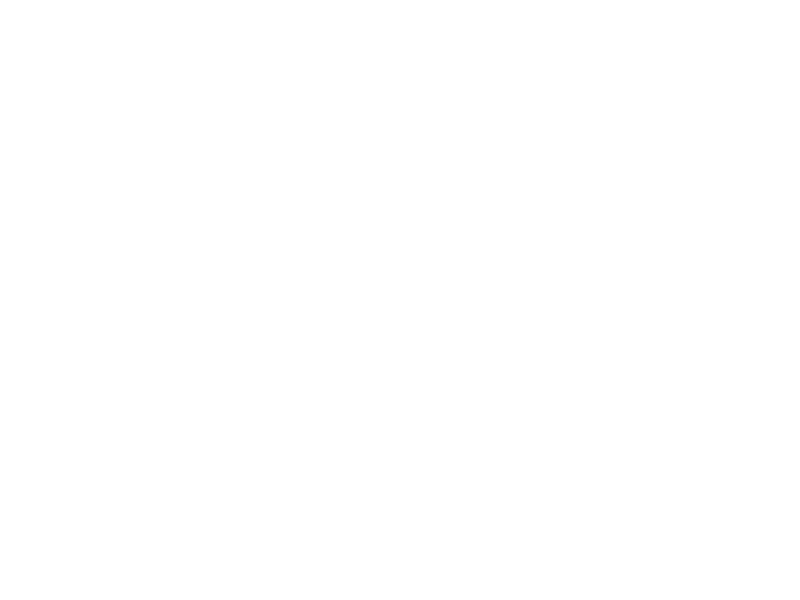

AttributeError: 'DataFrame' object has no attribute 'epix'

In [52]:
gr = df.groupby('ccm_E').sum()
figure()
plot(gr.epix/gr.cspad)

In [12]:
gr.epix/gr.cspad

ccm_E
7.699879    0.001299
dtype: float64

In [ ]:
keys = {
    'step': ['ControlData', 'ccmE'], 
    'cspad': ['cs140_rob', 'sum'], 
    'cspad_good': ['cs140_rob', 'isgood'],
    'epix': ['epix_2', 'sum'], 
    'epix_good': ['epix_2', 'isgood'],
}
df, path = construct_dataframe(132, keys=keys)
df

In [ ]:
gr = df.groupby('step').mean()
plot(gr.epix/gr.cspad)